In [3]:
!pip install fuzzy-c-means

     |████████████████████████████████| 10.9 MB 7.8 MB/s 


In [4]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt
import pandas as pd

training_data = pd.read_excel('training.xlsx')
training_data.columns



Index(['Option', 'Observed GWP (assessed)', 'location', 'floorplan',
       'buildingheight', 'buildinglength', 'buildingwidth', 'floorarea',
       'orientation', 'roomwidith', 'mroomlength', 'mroomwidith', 'roomlength',
       'passwidth', 'elevationheight', 'roomnumber', 'meetingroomnumber',
       'floornumber'],
      dtype='object')

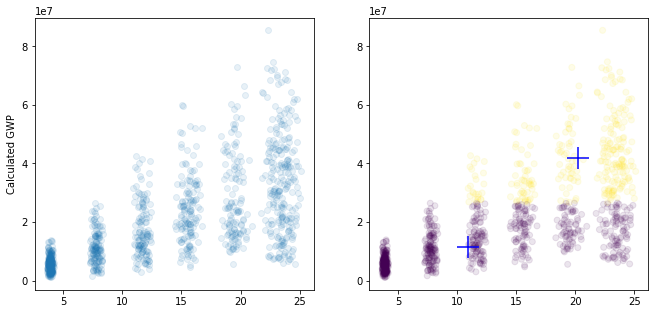

In [5]:
my_model = FCM(n_clusters=2)
X = training_data[['buildingheight','Observed GWP (assessed)']].to_numpy()
my_model.fit(X)

fcm_centers = my_model.centers
fcm_labels = my_model.predict(X)

f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[0].set_ylabel("Calculated GWP")

axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='b')
plt.show()